In [1]:
from collections import Counter
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

import anndata
import scanpy as sc

/gpfs/radev/home/sr2464/.conda/envs/cellot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib as mpl

In [3]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

In [9]:
mpl.rcParams['figure.facecolor'] = 'white'

In [5]:
orig_data_path = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_data/harmony_common_pancreas_20241025.h5ad"
BASE_PATH = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_training_runs/run8_X_harmony/evals_iid_data_space"
cell_ot_transported_data_path = os.path.join(BASE_PATH, "imputed.h5ad")

In [6]:
orig_adata = anndata.read_h5ad(orig_data_path)
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
print(orig_adata.X.data.max())
print(orig_adata.X.data.mean())
print(orig_adata.X.data.min())

8.047143
0.95751846
0.13720855


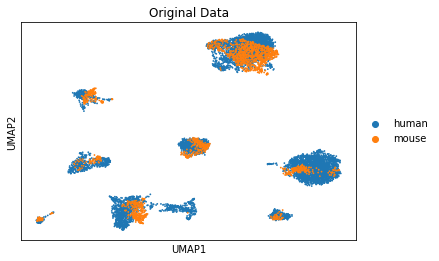

In [10]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
# plt.savefig(os.path.join(BASE_PATH, "orig_data_color_species.png"),
#             facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

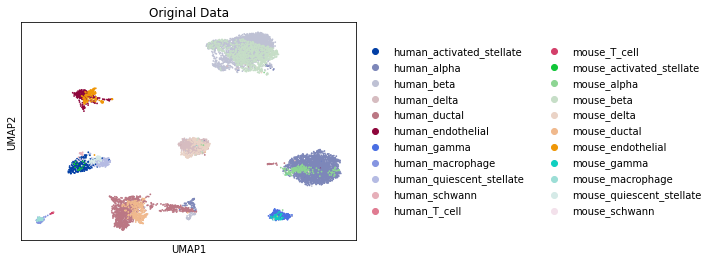

In [11]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
# plt.savefig(os.path.join(BASE_PATH, "orig_data_color_cell_type.png"),
#             facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Sanity check

In [12]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [13]:
del orig_adata.obsm
del orig_adata.uns
del orig_adata.varm
del orig_adata.obsp

In [14]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [16]:
orig_adata.raw is None

True

In [17]:
sc.pp.highly_variable_genes(orig_adata, subset=False,n_top_genes=2000,batch_key='batch_sample')
sc.tl.pca(orig_adata,use_highly_variable=True)
sc.external.pp.harmony_integrate(orig_adata,'batch_sample',basis='X_pca',adjusted_basis='X_pca_harmony_library')

/gpfs/radev/home/sr2464/.conda/envs/cellot/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
2024-10-25 12:39:17,007 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-10-25 12:39:18,962 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-10-25 12:39:18,985 - harmonypy - INFO - Iteration 1 of 10
2024-10-25 12:39:20,212 - harmonypy - INFO - Iteration 2 of 10
2024-10-25 12:39:21,665 - harmonypy - INFO - Iteration 3 of 10
2024-10-25 12:39:22,889 - harmonypy - INFO - Iteration 4 of 10
2024-10-25 12:39:24,239 - harmonypy - INFO - Iteration 5 of 10
2024-10-25 12:39:25,459 - harmonypy - INFO - Iteration 6 of 10
2024-10-25 12:39:26,105 - harmonypy - INFO - Converged after 6 iterations


In [18]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'X_pca', 'X_pca_harmony_library'
    varm: 'PCs'

In [19]:
sc.pp.neighbors(orig_adata, use_rep="X_pca_harmony_library")

In [20]:
sc.tl.umap(orig_adata)

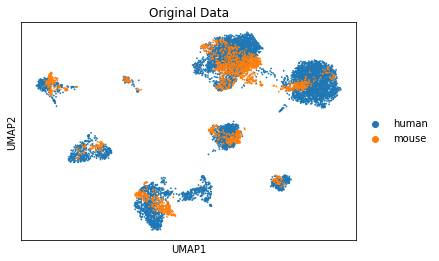

In [22]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
# plt.savefig(os.path.join(BASE_PATH, "orig_data_color_cell_type.png"),
#             facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

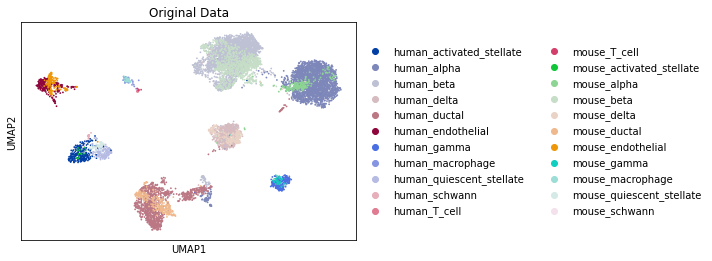

In [21]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
# plt.savefig(os.path.join(BASE_PATH, "orig_data_color_cell_type.png"),
#             facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [ ]:
del orig_adata.obsm
del orig_adata.varm
del orig_adata.obsp
del orig_adata.uns

In [ ]:
orig_adata

In [ ]:
sc.pp.highly_variable_genes(orig_adata, subset=False,n_top_genes=2000,batch_key='batch_sample')
sc.tl.pca(orig_adata,use_highly_variable=True)
sc.external.pp.harmony_integrate(orig_adata,'batch_sample',basis='X_pca',adjusted_basis='X_pca_harmony_library')

In [ ]:
orig_adata

In [ ]:
sc.pp.neighbors(orig_adata, use_rep="X_pca_harmony_library")

In [ ]:
orig_adata

In [ ]:
sc.tl.umap(orig_adata)

In [ ]:
orig_adata

In [ ]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "harmony_umap_color_cell_type.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [ ]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "harmony_umap_color_cell_type.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [ ]:
cell_ot_transport_adata = anndata.read_h5ad(cell_ot_transported_data_path)
cell_ot_transport_adata

In [ ]:
orig_adata_reduced = anndata.AnnData(
    X=orig_adata.obsm["X_pca_harmony_library"],
    var=cell_ot_transport_adata.var.copy(),
    obs=orig_adata.obs.copy()
)

In [ ]:
orig_adata_reduced

In [ ]:
# orig_adata_reduced.obsm["X_pca"] = orig_adata_reduced.X

In [ ]:
orig_adata_reduced.obsm["X_pca_harmony_library"] = orig_adata_reduced.X

In [ ]:
orig_adata_reduced

In [ ]:
cell_ot_transport_adata

# Visualize original cells

In [ ]:
# del orig_adata_reduced.obsm
# del orig_adata_reduced.varm
# del orig_adata_reduced.obsp
# del orig_adata_reduced.uns

In [ ]:
orig_adata_reduced

In [ ]:
# sc.tl.pca(orig_adata_reduced)

In [ ]:
sc.pp.neighbors(orig_adata_reduced, use_rep="X_pca_harmony_library")

In [ ]:
sc.tl.umap(orig_adata_reduced)

In [ ]:
orig_adata_reduced

In [ ]:
orig_adata_reduced.raw

In [ ]:
sc.pl.umap(
    orig_adata_reduced,
    color="species_label",
    title="Pancreas UMAP",
    show=False,
)
plt.savefig(os.path.join(BASE_PATH, "orig_adata_reduced_umap.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [ ]:
orig_adata

# Visualize cells

In [ ]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [ ]:
cell_ot_transport_adata

In [ ]:
cell_ot_transport_adata.X[:5, :5]

In [ ]:
sc.tl.pca(cell_ot_transport_adata)
# cell_ot_transport_adata.obsm["X_pca"] = cell_ot_transport_adata.X

In [ ]:
cell_ot_transport_adata

In [ ]:
cell_ot_transport_adata.obsm["X_pca"].shape

In [ ]:
sc.pp.neighbors(cell_ot_transport_adata)

In [ ]:
sc.tl.umap(cell_ot_transport_adata)

In [ ]:
cell_ot_transport_adata

In [ ]:
cell_ot_transport_adata.obs.head()

In [ ]:
Counter(cell_ot_transport_adata.obs["species_label"].tolist())

In [ ]:
Counter(cell_ot_transport_adata.obs["split"].tolist())

In [ ]:
Counter(cell_ot_transport_adata.obs["transport"].tolist())

In [ ]:
sc.pl.umap(
    cell_ot_transport_adata,
    color="species_label",
    title="CellOT Transported Data",
    show=False,
)
plt.savefig(os.path.join(BASE_PATH, "cell_ot_transport_adata_umap.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Comebine adatas, see where transported cells are

In [ ]:
del orig_adata_reduced.obsm
del orig_adata_reduced.uns
del orig_adata_reduced.varm
del orig_adata_reduced.obsp

In [ ]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [ ]:
orig_adata_reduced

In [ ]:
cell_ot_transport_adata

In [ ]:
orig_data_label = ["Original Data (" + species_label + ")" for species_label in orig_adata_reduced.obs["species_label"]]
orig_adata_reduced.obs["transport_flag"] = orig_data_label
cell_ot_transport_adata.obs["transport_flag"] = "Transported Cells"

In [ ]:
combined_adata = orig_adata_reduced.concatenate(cell_ot_transport_adata)
combined_adata

In [ ]:
combined_adata

# Visualize

In [ ]:
sc.tl.pca(combined_adata)

In [ ]:
sc.pp.neighbors(combined_adata)

In [ ]:
sc.tl.umap(combined_adata)

In [ ]:
combined_adata

In [ ]:
sc.pl.umap(
    combined_adata,
    color="transport_flag",
    title="CellOT Transported Data Versus Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "cell_ot_human_transported_vs_orig_data.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()